In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.rc("text", usetex=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 18,
                     'figure.autolayout': True})

# x = np.arange(0, 4000, 1)
# y = np.arange(0, 50000, 10)
# X,Y = np.meshgrid(x,y)
# zs = np.array(error_func(np.ravel(X), np.ravel(Y)))
# Z = zs.reshape(X.shape)

# plt.imshow(Z)
# plt.show()

def load_file(fname, skip = 1):
    dat = np.loadtxt(fname,delimiter = ',' ,skiprows=skip)
    x,y = np.hsplit(dat, 2)
    x = np.concatenate(x, axis=0 )
    y = np.concatenate(y, axis=0 )
    
# x,y = load_file("PHYS159_12;36;13_C0.csv")
# # x1,y1 = load_file("PHYS159_13;45;40_C1.csv")
# # x2,y2 = load_file("PHYS159_13;45;40_C2.csv")
# plt.plot(x,y, linewidth = 3)
# # plt.plot(x1,y1, linewidth = 3)

# plt.xlabel("Time [ms]")
# plt.ylabel("Voltage [V]")

In [33]:
from scipy.optimize import minimize

# max arduino voltage
v_ref = 5.00
maxval = 4096
# set of unknown resistors in [Ohms]
r_range = np.array([1220, 20000])

def delta_R (x, R):
    return abs(x/(maxval - x))*(0.01)*R + abs(R*maxval/(maxval - x)**2)*(8.192)

def error (R):
    total_error = 0
    for entry in r_range:
        x = v_ref*(entry/(entry + R))*(maxval/v_ref)
        total_error += (delta_R(x, R)/entry)
    return total_error/r_range.size

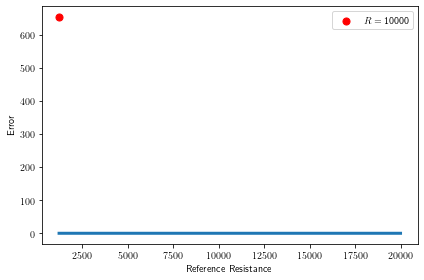

In [34]:
R = np.arange(min(r_range), max(r_range), 1)
Y = error(R)
R_min = R[np.argmin(Y)]
Y_min = error(R[np.argmin(Y)])

plt.plot(R, Y, linewidth = 3)
plt.scatter([R_min], 
            [Y_min], 
            s = 50, 
            label = "$R_{F} = \,$" + "{:n}".format(R_min) + " $\Omega$",
            color = "red")

plt.legend()
plt.xlabel("Reference resistance")
plt.ylabel("Loss function")
plt.show()